# Tutorial for dual_autodiff

This tutorial demonstrates how to use the `dual_autodiff` package for forward-mode automatic differentiation using dual numbers.
We will explore:
- Creating and manipulating dual numbers
- Using mathematical operations
- Applying automatic differentiation


In [62]:
import dual_autodiff as df
import dual_autodiff_x as dfx
from dual_autodiff.dual import Dual
from dual_autodiff.functions import sin,cos,log
import numpy as np

In [63]:
# Create a dual number
x = Dual(2, 1)  # Real part = 2, Dual part = 1

# Display the dual number
print("Dual number:", x)

Dual number: 2 + 1ε


In [ ]:
x = Dual(2, 1)

# Perform mathematical operations
print("sin(x):", sin(x))
print("cos(x):", cos(x))
print("log(x):", log(x))

# Combine with another dual number
y = Dual(3, 0.5)
result = x + y * log(x)
print("Result of x + y * log(x):", result)


sin(x): 0.9092974268256817 - 0.4161468365471424ε
cos(x): -0.4161468365471424 - 0.9092974268256817ε
log(x): 0.6931471805599453 + 0.5ε
Result of x + y * log(x): 4.079441541679836 + 2.8465735902799727ε


In [51]:
# Function definition using Dual numbers
def f_dual(x):
    return log(sin(x)) + x**2 * cos(x)

# Compute f(x) and its derivative at x = 1.5 using Dual numbers
x_val_dual = Dual(1.5, 1)
result_dual = f_dual(x_val_dual)

print("Using Dual Numbers:")
print(f"f(1.5) using Dual Numbers: {result_dual.real:.17g}")
print(f"f'(1.5) using Dual Numbers: {result_dual.dual:.17g}")

# Function definition using double-precision floats
def f(x):
    return np.log(np.sin(x)) + x**2 * np.cos(x)

# Compute f'(x) manually
def df(x):
    m1 = -(x**2) * np.sin(x)
    m2 = np.cos(x) / np.sin(x)
    m3 = 2 * x * np.cos(x)
    return m1 + m2 + m3

# Calculate f(x) and its derivative at x = 1.5 using manual computation
x_val = 1.5
f_result = f(x_val)
df_result = df(x_val)

print("\nUsing Manual Computation:")
print(f"f(1.5) using Manual Computation: {f_result:.17g}")
print(f"f'(1.5) using Manual Computation: {df_result:.17g}")

Using Dual Numbers:
f(1.5) using Dual Numbers: 0.15665054756073515
f'(1.5) using Dual Numbers: -1.9612372705533612

Using Manual Computation:
f(1.5) using Manual Computation: 0.15665054756073515
f'(1.5) using Manual Computation: -1.9612372705533614


Plot saved successfully to: /Users/raunaqrai/Documents/DIS/coursework/c1/dual_autodiff/report/convergence_derivative.png


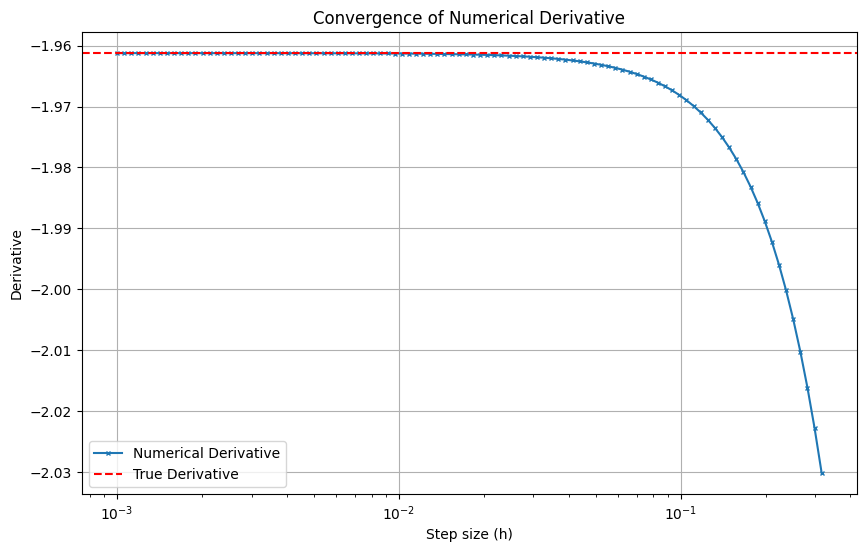

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical derivative using finite differences
def numerical_derivative(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Function for numerical computation
def f_numeric(x):
    return np.log(np.sin(x)) + x**2 * np.cos(x)

# Compute derivatives for decreasing step sizes
x_val = 1.5
steps = np.logspace(-0.5, -3, 100)
numerical_results = [numerical_derivative(f_numeric, x_val, h) for h in steps]

# True value for comparison
true_derivative = f(Dual(x_val, 1)).dual

# Compute differences
differences = np.abs(np.array(numerical_results) - true_derivative)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(steps, numerical_results, label="Numerical Derivative", marker='x', markersize=3)
plt.axhline(y=true_derivative, color='r', linestyle='--', label="True Derivative")

plt.xscale("log")
plt.xlabel("Step size (h)")
plt.ylabel("Derivative")
plt.title("Convergence of Numerical Derivative")
plt.legend()
plt.grid()

# Save the figure in high resolution
save_path = "/Users/raunaqrai/Documents/DIS/coursework/c1/dual_autodiff/report/convergence_derivative.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # dpi=300 ensures high resolution
print(f"Plot saved successfully to: {save_path}")

plt.show()


# Comparing the performance of the pure Python version and the Cythonized version

In [65]:
pip install rsr45-dual-autodiff-x


Note: you may need to restart the kernel to use updated packages.


In [66]:
import time
import matplotlib.pyplot as plt
from dual_autodiff.dual import Dual as PythonDual
from dual_autodiff_x.dual import Dual as CythonDual



In [67]:
def linear_function(x):
    return x + 2

def quadratic_function(x):
    return x ** 2 + 3 * x + 5

def trig_function(x):
    return x.sin() + (x ** 2).cos()

def log_function(x):
    return x.log() + x ** 2

def composite_function(x):
    return (x.sin() + 1).log() + x ** 2 * x.cos()

def nested_function(x):
    return (x ** 2).exp() - (x.sin() + x ** 3).sqrt()

def iterative_function(x, n=100):
    result = x
    for i in range(1, n + 1):
        result += (x + i) ** 2
    return result

def piecewise_function(x):
    if x.real < 1:
        return x ** 2
    else:
        return x.sin() + x.log()

def iterative_exponential_function(x, n=100):
    result = x
    for i in range(1, n + 1):
        result += (x + i).exp() - (x ** 2 + i).sqrt()
    return result

def high_degree_polynomial(x):
    return x ** 7 + 6 * x ** 6 + 15 * x ** 5 + 20 * x ** 4 + 15 * x ** 3 + 6 * x ** 2 + x

def nested_square_root_log(x):
    return x.sqrt().sqrt().sqrt().log()

def recursive_function(x, n=5):
    if n == 1:
        return x.sqrt() + x * x.cos()
    else:
        return recursive_function(x, n - 1).sqrt() + x * x.sin()

def composite_conditional_function(x):
    if x.real < 2:
        return (x ** 2).sin() + x.log()
    else:
        return x.exp() - x ** 3

def long_iterative_function(x, n=100):
    result = x
    for i in range(1, n + 1):
        result += (x + i).sin() + (x * i).cos().exp() - (x + i ** 2).log()
    return result


In [68]:
test_functions = [
    linear_function,
    quadratic_function,
    trig_function,
    log_function,
    composite_function,
    nested_function,
    iterative_function,
    piecewise_function,
    iterative_exponential_function,
    high_degree_polynomial,
    nested_square_root_log,
    recursive_function,
    composite_conditional_function,
    long_iterative_function
]


In [69]:
def measure_execution_time(dual_class, func, n_iterations=1000):
    start_time = time.time()
    x = dual_class(2, 1)
    for _ in range(n_iterations):
        func(x)
    end_time = time.time()
    return end_time - start_time


In [70]:
for func in test_functions:
    python_time = measure_execution_time(PythonDual, func, n_iterations=1000)
    cython_time = measure_execution_time(CythonDual, func, n_iterations=1000)
    print(f"{func.__name__}: Python={python_time:.4f}s, Cython={cython_time:.4f}s")


linear_function: Python=0.0005s, Cython=0.0003s
quadratic_function: Python=0.0025s, Cython=0.0013s
trig_function: Python=0.0075s, Cython=0.0053s
log_function: Python=0.0032s, Cython=0.0021s
composite_function: Python=0.0080s, Cython=0.0061s
nested_function: Python=0.0065s, Cython=0.0047s
iterative_function: Python=0.0961s, Cython=0.0541s
piecewise_function: Python=0.0026s, Cython=0.0022s
iterative_exponential_function: Python=0.3399s, Cython=0.2471s
high_degree_polynomial: Python=0.0056s, Cython=0.0037s
nested_square_root_log: Python=0.0031s, Cython=0.0026s
recursive_function: Python=0.0148s, Cython=0.0127s
composite_conditional_function: Python=0.0018s, Cython=0.0013s
long_iterative_function: Python=0.6245s, Cython=0.4983s


In [71]:
import time
import matplotlib.pyplot as plt

# Define a range of complexities (e.g., iterations)
complexities = [10, 100, 1000, 10000, 50000]

# Initialize storage for results
python_times = []
cython_times = []

# Measure execution time for each complexity
for n in complexities:
    python_start = time.time()
    long_iterative_function(PythonDual(2, 1), n=n)
    python_times.append(time.time() - python_start)

    cython_start = time.time()
    iterative_function(CythonDual(2, 1), n=n)
    cython_times.append(time.time() - cython_start)


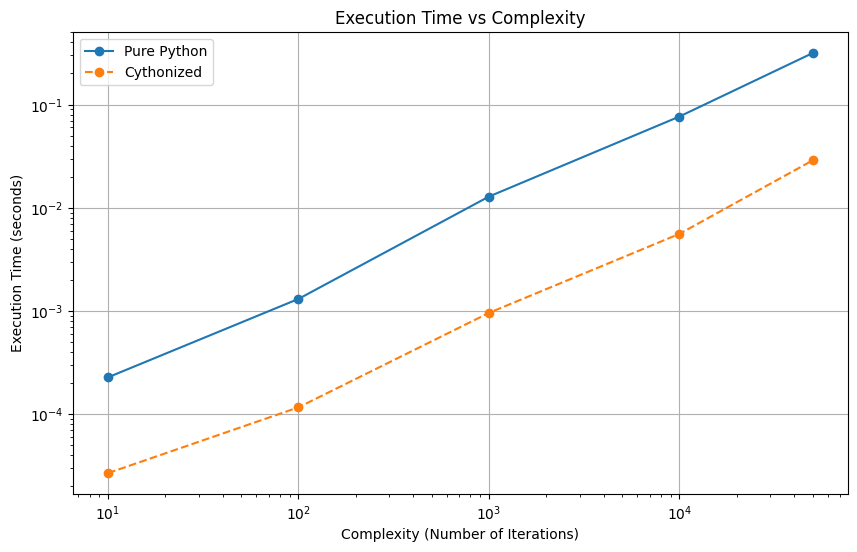

In [72]:
plt.figure(figsize=(10, 6))

# Plot execution times
plt.plot(complexities, python_times, label="Pure Python", marker="o", linestyle="-")
plt.plot(complexities, cython_times, label="Cythonized", marker="o", linestyle="--")

# Customize plot
plt.xscale("log")  # Logarithmic scale for complexity
plt.yscale("log")  # Logarithmic scale for execution time (optional)
plt.xlabel("Complexity (Number of Iterations)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs Complexity")
plt.legend()
plt.grid(True)

plt.show()


there is a clear performance difference between the pure Python and the Cythonized implementations, particularly for more computationally intensive functions.

For simpler functions like linear_function, quadratic_function, and piecewise_function, the performance difference between Python and Cythonized versions is minimal.

These functions involve minimal computations, so the overhead of function calls dominates execution time. Cython's optimizations are less significant here.

For highly iterative or nested functions like iterative_function, iterative_exponential_function, and long_iterative_function, the Cythonized version outperforms the Python version.

These functions involve extensive loops and nested operations, where Cython's optimizations, such as converting loops into C-style iterations, reduce overhead.

Cython's static typing and compiled nature make it inherently faster for operations involving loops, nested functions, and heavy computations.

Cythonization is most effective when applied to functions with high computational loads or extensive loops, while the benefits for simpler functions are minimal.

# Cosmology Context

In [73]:
import time
from dual_autodiff.dual import Dual as PythonDual
from dual_autodiff_x.dual import Dual as CythonDual


# Define functions
def growth_factor(a, omega_m, dual_class):
    a_dual = dual_class(a, 1.0)
    D = a_dual ** 2  # Example trial solution
    dD_da = D.dual / D.real  # First derivative
    return -3 * (omega_m / a_dual ** 5) * D + (3 / a_dual) * dD_da

def comoving_distance(z, H0, omega_m, omega_r, omega_lambda, dual_class):
    z_dual = dual_class(z, 1.0)
    H_z = H0 * ((omega_m * (1 + z_dual) ** 3) +
                (omega_r * (1 + z_dual) ** 4) +
                omega_lambda).sqrt()
    return 1 / H_z

# Timing function
def measure_execution_time(func, *args, dual_class, n_iterations=1000):
    start_time = time.time()
    for _ in range(n_iterations):
        func(*args, dual_class=dual_class)
    end_time = time.time()
    return end_time - start_time

# Constants for testing
a = 1.0
z = 0.5
omega_m = 0.3
omega_r = 0.0
omega_lambda = 0.7
H0 = 70.0
n_iterations = 1000

# Measure execution times
python_time_growth = measure_execution_time(growth_factor, a, omega_m, dual_class=PythonDual, n_iterations=n_iterations)
cython_time_growth = measure_execution_time(growth_factor, a, omega_m, dual_class=CythonDual, n_iterations=n_iterations)

python_time_comoving = measure_execution_time(comoving_distance, z, H0, omega_m, omega_r, omega_lambda, dual_class=PythonDual, n_iterations=n_iterations)
cython_time_comoving = measure_execution_time(comoving_distance, z, H0, omega_m, omega_r, omega_lambda, dual_class=CythonDual, n_iterations=n_iterations)

# Print results
print(f"Growth Factor: Python={python_time_growth:.4f}s, Cython={cython_time_growth:.4f}s")
print(f"Comoving Distance: Python={python_time_comoving:.4f}s, Cython={cython_time_comoving:.4f}s")


Growth Factor: Python=0.0039s, Cython=0.0018s
Comoving Distance: Python=0.0054s, Cython=0.0036s


In [74]:
def measure_execution_time_varying_dual(dual_class, array_length, dual_range, n_iterations=100):
    """
    Measures the execution time for a given dual class with varying array lengths and dual number values.
    
    Parameters:
    - dual_class: The Dual class implementation (Python or Cythonized).
    - array_length: Length of the array of dual numbers.
    - dual_range: Tuple (start, stop) to generate the range of real parts of dual numbers.
    - n_iterations: Number of iterations for repeated function evaluation.
    
    Returns:
    - Execution time in seconds.
    """
    real_values = np.linspace(dual_range[0], dual_range[1], array_length)
    dual_array = [dual_class(real, 1.0) for real in real_values]  # Dual numbers with varying real parts
    start_time = time.time()
    for _ in range(n_iterations):
        test_function(dual_array)
    end_time = time.time()
    return end_time - start_time


In [27]:
pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 12.9 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.4 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


Plot saved successfully to: /Users/raunaqrai/Documents/DIS/coursework/c1/dual_autodiff/report/performance_comparison.png


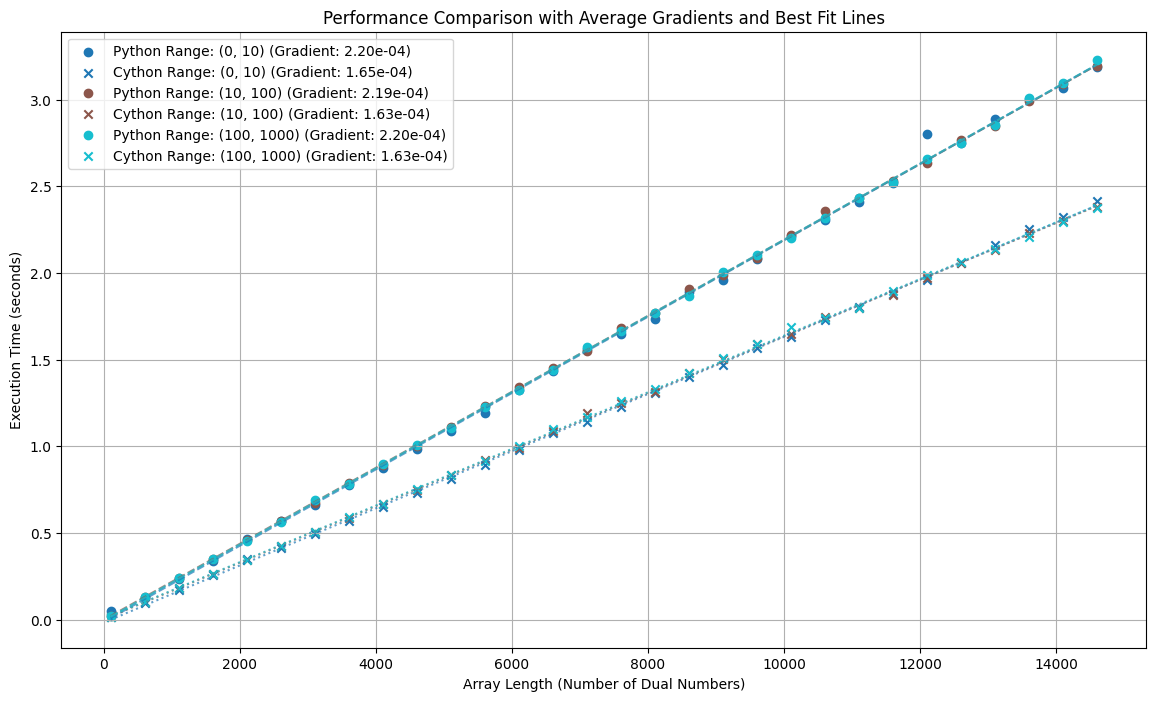

In [77]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.cm import tab10  # Use a colormap for consistent colors

# Define a simple test function
def test_function(dual_array):
    result = dual_array[0]
    for dual in dual_array[1:]:
        result += dual.sin() * dual ** 2
    return result

# Function to measure execution time
def measure_execution_time_varying_dual(dual_class, array_length, dual_range, n_iterations=100):
    # Generate dual numbers with varying ranges
    dual_array = [dual_class(np.random.uniform(*dual_range), 1.0) for _ in range(array_length)]
    start_time = time.time()
    for _ in range(n_iterations):
        test_function(dual_array)
    end_time = time.time()
    return end_time - start_time

# Array lengths and ranges for dual numbers
array_lengths = np.arange(100, 15000, 500)  # Avoid length 0 for meaningful results
dual_ranges = [(0, 10), (10, 100), (100, 1000)]  # Varying ranges for the real parts of dual numbers

# Assign colors to each range
colors = tab10(np.linspace(0, 1, len(dual_ranges)))

# Performance measurements
results = {}

for dual_range in dual_ranges:
    python_times = []
    cython_times = []
    for length in array_lengths:
        # Ensure PythonDual and CythonDual are defined in your environment
        python_time = measure_execution_time_varying_dual(PythonDual, length, dual_range)
        cython_time = measure_execution_time_varying_dual(CythonDual, length, dual_range)
        python_times.append(python_time)
        cython_times.append(cython_time)
    results[dual_range] = (python_times, cython_times)

# Gradient calculation and regression
gradients = {}
line_fits = {}

for dual_range, (python_times, cython_times) in results.items():
    # Perform linear regression for Python and Cython
    python_model = LinearRegression().fit(array_lengths.reshape(-1, 1), python_times)
    cython_model = LinearRegression().fit(array_lengths.reshape(-1, 1), cython_times)

    # Store the slope (average gradient) and predictions
    gradients[dual_range] = (python_model.coef_[0], cython_model.coef_[0])
    line_fits[dual_range] = (
        python_model.predict(array_lengths.reshape(-1, 1)),
        cython_model.predict(array_lengths.reshape(-1, 1))
    )

# Plotting results
plt.figure(figsize=(14, 8))

for i, (dual_range, (python_times, cython_times)) in enumerate(results.items()):
    python_grad, cython_grad = gradients[dual_range]
    label_range = f"Range: {dual_range}"
    python_label = f"Python {label_range} (Gradient: {python_grad:.2e})"
    cython_label = f"Cython {label_range} (Gradient: {cython_grad:.2e})"
    color = colors[i]

    # Scatter plot for data points
    plt.scatter(array_lengths, python_times, label=python_label, marker="o", color=color)
    plt.scatter(array_lengths, cython_times, label=cython_label, marker="x", color=color)

    # Line of best fit
    python_fit, cython_fit = line_fits[dual_range]
    plt.plot(array_lengths, python_fit, linestyle="--", color=color, alpha=0.7)
    plt.plot(array_lengths, cython_fit, linestyle=":", color=color, alpha=0.7)

plt.xlabel("Array Length (Number of Dual Numbers)")
plt.ylabel("Execution Time (seconds)")
plt.title("Performance Comparison with Average Gradients and Best Fit Lines")
plt.legend(loc="upper left", fontsize=10)
plt.grid(True)
# Save the figure in high resolution
save_path = "/Users/raunaqrai/Documents/DIS/coursework/c1/dual_autodiff/report/performance_comparison.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
print(f"Plot saved successfully to: {save_path}")
plt.show()

